In [8]:

import numpy as np
import pandas as pd
import h5py
from sklearn import svm

import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
with h5py.File("data/full_dataset_vectors.h5", "r") as data:    
    # Split the data into training/test features/targets
    x_train = data["X_train"][:]
    y_train = data["y_train"][:]
    x_test = data["X_test"][:] 
    y_test = data["y_test"][:]

In [10]:
svm_model = svm.LinearSVC()
svm_model.fit(x_train,y_train)

c:\Users\richg\miniconda3\envs\hello\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [5]:
#eval the model
y_pred=svm_model.predict(x_test)
print("Accuracy: ", svm_model.score(x_test,y_test))

Accuracy:  0.681


In [6]:

from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.739     0.900     0.812       170
           1      0.911     0.976     0.943       252
           2      0.683     0.547     0.608       232
           3      0.596     0.640     0.617       214
           4      0.594     0.645     0.619       220
           5      0.778     0.523     0.625       174
           6      0.571     0.580     0.575       174
           7      0.659     0.702     0.680       198
           8      0.657     0.635     0.646       178
           9      0.592     0.601     0.596       188

    accuracy                          0.681      2000
   macro avg      0.678     0.675     0.672      2000
weighted avg      0.683     0.681     0.678      2000



<AxesSubplot:>

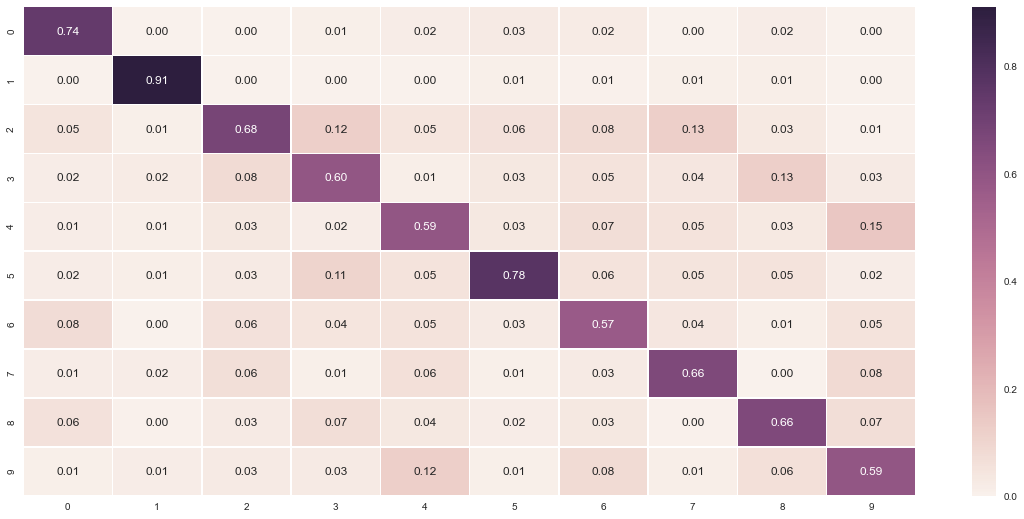

In [7]:
confusion_matrix_result = confusion_matrix(y_test , y_pred , normalize='pred')
df_cm = pd.DataFrame(confusion_matrix_result, index=range(10), columns=range(10))
plt.figure(figsize=(20, 9))
sns.heatmap(df_cm, annot=True, linewidths=0.5, fmt=".2f")